In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tempfile
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import cm
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, DenseFeatures, Dropout
from tensorflow.keras.models import Sequential

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 10)

In [3]:
fraud_csv = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [4]:
fraud_csv.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud_csv.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
fraud_csv.info()
print(len(fraud_csv))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
neg, pos = np.bincount(fraud_csv['Class'])
print(neg, pos)
print("Positive count =", 100 * pos/(pos+neg), "%")

284315 492
Positive count = 0.1727485630620034 %


<AxesSubplot:xlabel='Amount', ylabel='Density'>

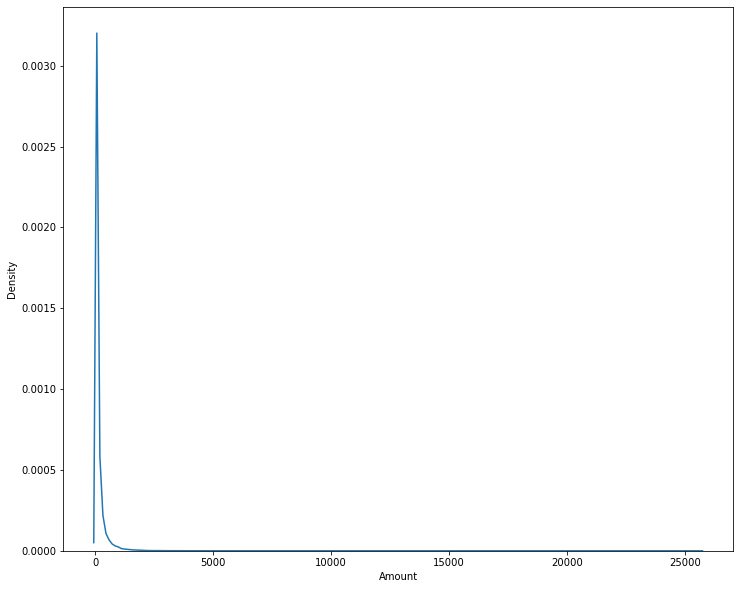

In [8]:
sns.kdeplot(fraud_csv['Amount'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

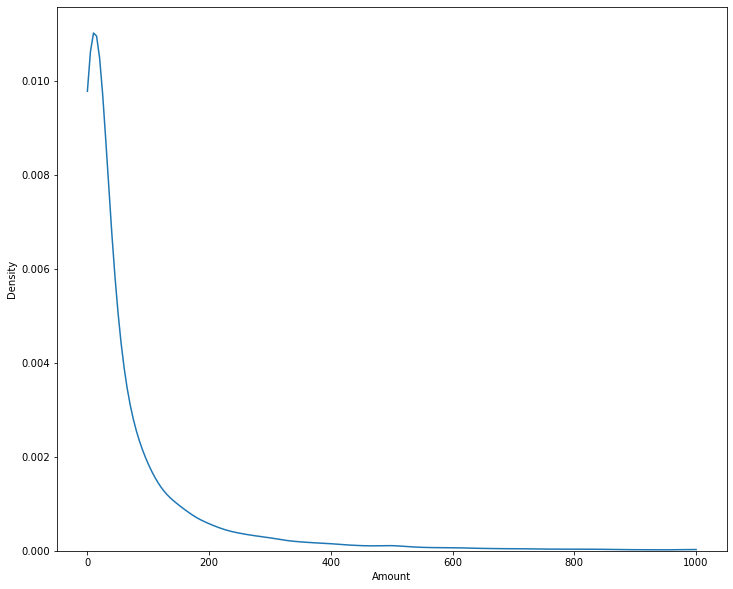

In [9]:
sns.kdeplot(fraud_csv['Amount'], clip = (0, 1000))

In [10]:
max_amount = fraud_csv['Amount'].max()
print(max_amount)
fraud_count = fraud_csv['Amount'].value_counts(bins = [0,100, max_amount])*100/fraud_csv.shape[0]
fraud_count

25691.16


(-0.001, 100.0]      80.159196
(100.0, 25691.16]    19.840804
Name: Amount, dtype: float64

In [11]:
fraud_csv['Amount'].quantile(0.9)

203.0

In [12]:
fraud_csv.pop('Time')

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [13]:
train_df, test_df = train_test_split(fraud_csv, test_size =0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.2)
print("Train size:", train_df.shape[0], "\nTest size:", test_df.shape[0], \
      "\nValidation size:", val_df.shape[0])
train_label = train_df.pop('Class')
test_label = test_df.pop('Class')
val_label = val_df.pop('Class')

train_feat = train_df
test_feat = test_df
val_feat = val_df

Train size: 182276 
Test size: 56962 
Validation size: 45569


In [14]:
train_bool = train_label != 0
pos_df = train_df[train_bool]
pos_label = train_label[train_bool]
neg_df = train_df[~train_bool]
neg_label = train_label[~train_bool]
neg_label

259891    0
97964     0
56498     0
11391     0
106596    0
         ..
236184    0
182205    0
65833     0
272255    0
224948    0
Name: Class, Length: 181984, dtype: int64

In [15]:
print(neg_df.shape[0])
print(pos_df.shape[0])

181984
292


In [16]:
Metrics = [keras.metrics.Precision(name = 'Precision'), \
           keras.metrics.TruePositives(name = "TP"), \
           keras.metrics.FalsePositives(name = "FP"), \
           keras.metrics.TrueNegatives(name = "TN"), \
           keras.metrics.FalseNegatives(name = "FN"), \
           keras.metrics.Recall(name = "Recall"), \
           keras.metrics.AUC(name = "AUC")]

In [17]:
train_df.shape[-1]

29

In [18]:
def make_model(metrics = Metrics, output_bias = None):
    if output_bias != None:
        output_bias = tf.keras.initializers.constant(output_bias)
    model = Sequential([Dense(16, activation = 'relu', \
                         input_shape=(29,)), \
                   Dropout(0.5), \
                   Dense(1, activation='sigmoid', bias_initializer=output_bias)])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), \
                  metrics = metrics, \
                  loss = tf.keras.losses.BinaryCrossentropy())
    return model

In [19]:
model = make_model()

In [20]:
model.predict(train_df)

array([[0.7885866 ],
       [0.99999905],
       [0.99982953],
       ...,
       [0.99999964],
       [0.99994266],
       [1.        ]], dtype=float32)

In [21]:
#Evaluating model 
results = model.evaluate(train_df, train_label, batch_size = 2048)

90/90 [==============================] - 1s 1ms/step - loss: 16.4600 - Precision: 0.0016 - TP: 290.0000 - FP: 181358.0000 - TN: 626.0000 - FN: 2.0000 - Recall: 0.9932 - AUC: 0.5132


In [22]:
print('Loss:', results[0])
for i in range(len(Metrics)):
    print(Metrics[i].name, ' :', results[i+1])

Loss: 16.459991455078125
Precision  : 0.0015964943449944258
TP  : 290.0
FP  : 181358.0
TN  : 626.0
FN  : 2.0
Recall  : 0.9931507110595703
AUC  : 0.5131827592849731


In [23]:
#Setting initial bias term at final layer
bias = np.log(pos/neg)
model_test = make_model(output_bias = bias)

In [24]:
results_test = model_test.evaluate(train_df, train_label, batch_size = 5000)

37/37 [==============================] - 1s 2ms/step - loss: 11.2701 - Precision: 0.0016 - TP: 409.0000 - FP: 252173.0000 - TN: 111795.0000 - FN: 175.0000 - Recall: 0.7003 - AUC: 0.5172


In [25]:
print('Loss:', results_test[0])
for i in range(len(Metrics)):
    print(Metrics[i].name, ' :', results_test[i+1])

Loss: 11.27006721496582
Precision  : 0.001619276124984026
TP  : 409.0
FP  : 252173.0
TN  : 111795.0
FN  : 175.0
Recall  : 0.7003424763679504
AUC  : 0.5171729326248169


In [26]:
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                480       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Save current weight for validating two models
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model_test.save_weights(initial_weights)

In [28]:
BATCH_SIZE = 2048 
EPOCH = 30
bias

-6.359359340922742

In [29]:
model_non_bias = make_model()
model_non_bias.load_weights(initial_weights)
model_non_bias.layers[-1].bias.assign([0.0])
print(model_non_bias.layers[-1].bias)
non_bias_hist = model_non_bias.fit(train_df, train_label, verbose= 0, validation_data = \
                          (val_df, val_label), batch_size = BATCH_SIZE, epochs = EPOCH)

<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [30]:
model_bias = make_model(output_bias = bias)
model_bias.load_weights(initial_weights)
print(model_bias.layers[-1].bias)
bias_hist = model_bias.fit(train_df, train_label, verbose=0, validation_data = \
                          (val_df, val_label), batch_size = BATCH_SIZE, epochs = EPOCH)

<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-6.3593593], dtype=float32)>


In [31]:
model_non_bias.layers[-1].bias

<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-0.3821188], dtype=float32)>

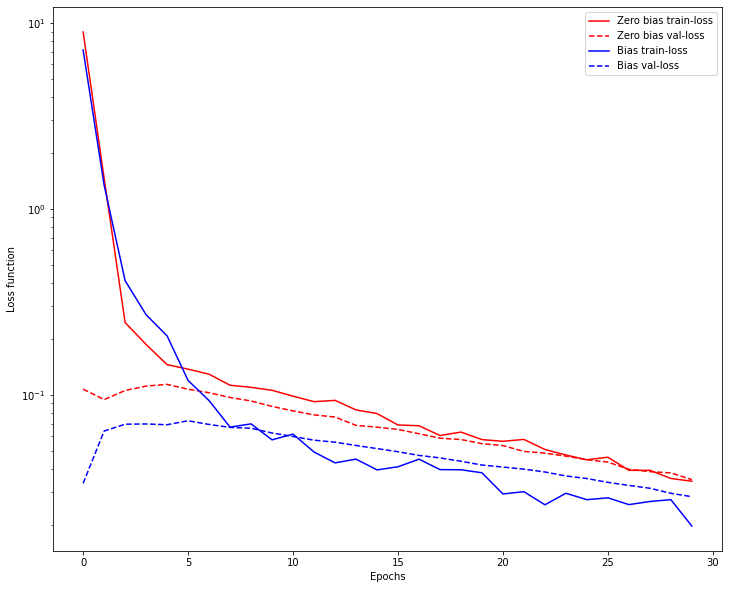

In [32]:
plt.semilogy(non_bias_hist.epoch, non_bias_hist.history['loss'], color = 'r',
            label = 'Zero bias train-loss')
plt.semilogy(non_bias_hist.epoch, non_bias_hist.history['val_loss'], color = 'r',
            label = 'Zero bias val-loss', linestyle = '--')

plt.semilogy(bias_hist.epoch, bias_hist.history['loss'], color='b',
             label = 'Bias train-loss')
plt.semilogy(bias_hist.epoch, bias_hist.history['val_loss'], color='b',
             label = 'Bias val-loss', linestyle ='--')

plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()

In [33]:
early_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_AUC', verbose = 0,
                                                  patience = 15, 
                                                  restore_best_weights = True,
                                                  mode = 'max')
                                                  

In [34]:
model = make_model()
model.load_weights(initial_weights)
assert model.layers[-1].bias != 0
history = model.fit(train_df, train_label, validation_data = (val_df,
                                                              val_label),
                    epochs = 100, verbose =0, batch_size = BATCH_SIZE, callbacks = early_callback)

In [35]:
def plot_metrics(history):
    metrics = ['loss', 'AUC', 'Recall', 'Precision']
    color = ['r', 'g', 'b', 'y']
    cmap = cm.rainbow(np.linspace(0,1,len(metrics)))
    for i, color, met in zip(range(len(metrics)), color, metrics):
        plt.subplot(2, 2, i+1)
        plt.plot(history.epoch, history.history[met], color = color,
                label = 'Train')
        plt.plot(history.epoch, history.history['val_' + met], color = color,
                 linestyle = "--",label = 'Val')
        
        plt.xlabel('Epochs')
        plt.ylabel(met)
        plt.legend()

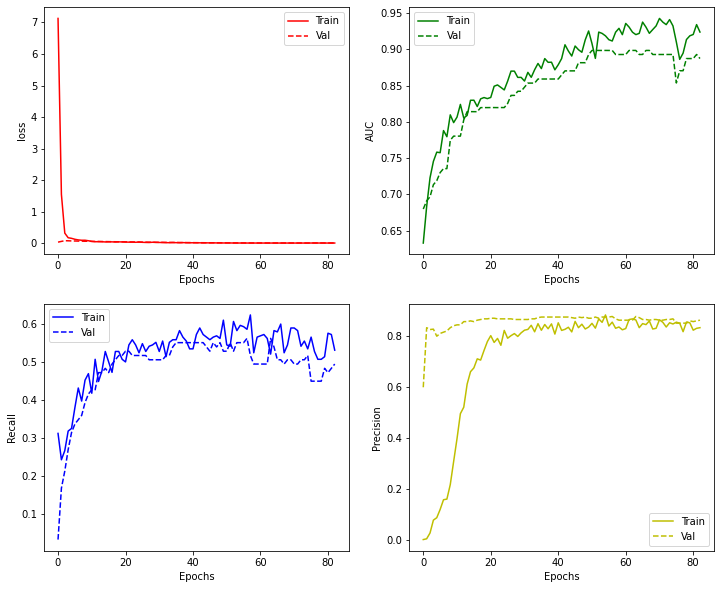

In [36]:
plot_metrics(history)

In [37]:
history.history.keys()

dict_keys(['loss', 'Precision', 'TP', 'FP', 'TN', 'FN', 'Recall', 'AUC', 'val_loss', 'val_Precision', 'val_TP', 'val_FP', 'val_TN', 'val_FN', 'val_Recall', 'val_AUC'])

In [38]:
results = model.evaluate(test_df, test_label, batch_size = BATCH_SIZE)
results

28/28 [==============================] - 0s 2ms/step - loss: 0.0051 - Precision: 0.8642 - TP: 70.0000 - FP: 11.0000 - TN: 56840.0000 - FN: 41.0000 - Recall: 0.6306 - AUC: 0.9096        


[0.005072365049272776,
 0.8641975522041321,
 70.0,
 11.0,
 56840.0,
 41.0,
 0.630630612373352,
 0.9096449613571167]

In [39]:
test_prediction_prob = model.predict(test_df, batch_size = BATCH_SIZE)
print(test_prediction_prob)
train_prediction_prob = model.predict(train_df, batch_size = BATCH_SIZE)
test_prediction = (test_prediction_prob > 0.5).astype("int32")
test_prediction

[[3.7776779e-05]
 [3.0591766e-06]
 [2.6372075e-04]
 ...
 [3.1244755e-04]
 [2.5701282e-05]
 [8.9529576e-06]]


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [40]:
confusion_matrix = sklearn.metrics.confusion_matrix(test_label, test_prediction)
confusion_matrix

array([[56840,    11],
       [   41,    70]])

<AxesSubplot:>

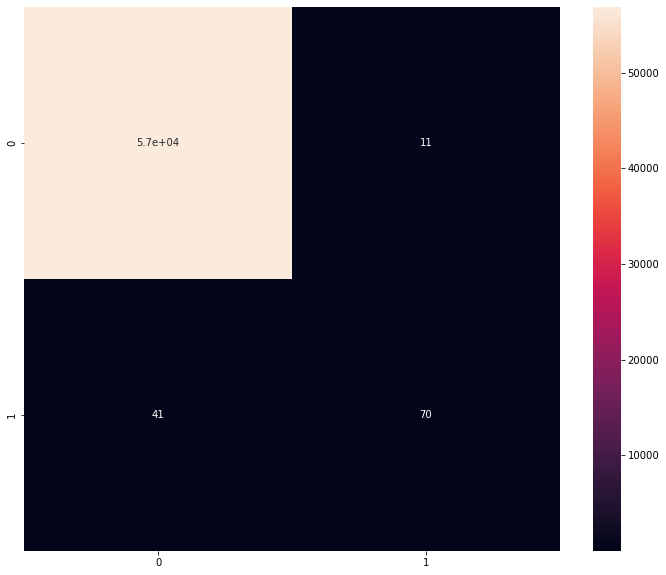

In [41]:
sns.heatmap(confusion_matrix, annot=True)

In [42]:
def plot_roc(test_label, test_prediction,  **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(np.array(test_label), test_prediction)
    plt.plot(fp, tp, linewidth=2, **kwargs)
    plt.grid(True)
    plt.ylim([0.8, 1.05])
    plt.xlim([0, 0.2])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

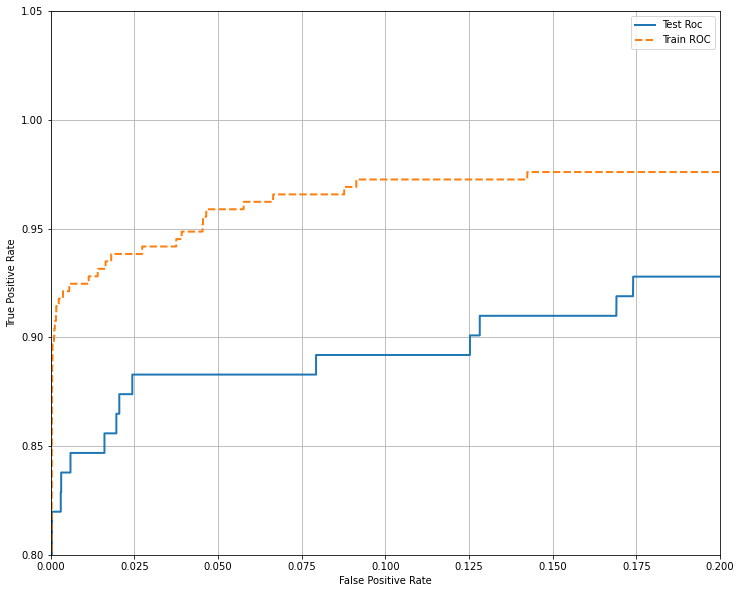

In [43]:
plot_roc(test_label, test_prediction_prob, label = "Test Roc")
plot_roc(train_label, train_prediction_prob, label = "Train ROC", 
         linestyle = '--')

In [44]:
length = fraud_csv.shape[0]
pos_weight = length/(2 * pos)
neg_weight = length/(2 * neg)
weight_dic = {0 : neg_weight, 1: pos_weight}

In [45]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)
EPOCH = 100

weighted_history = weighted_model.fit(train_df, train_label, validation_data = 
                                      (val_df, val_label), epochs = EPOCH, 
                                      callbacks = early_callback, batch_size = BATCH_SIZE,
                                      class_weight = weight_dic, verbose = 0)

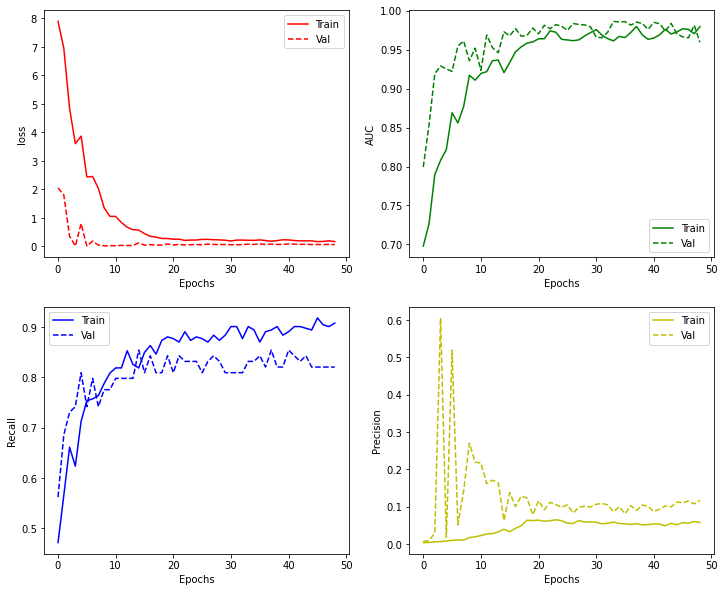

In [46]:
plot_metrics(weighted_history)

In [48]:
test_weighted_prediction = weighted_model.predict(test_df)
train_weighted_prediction = weighted_model.predict(train_df)
test_weighted_prediction_class = (test_weighted_prediction> 0.5).astype("int32")

In [49]:
weighted_confusion = sklearn.metrics.confusion_matrix(test_label, test_weighted_prediction_class)

<AxesSubplot:>

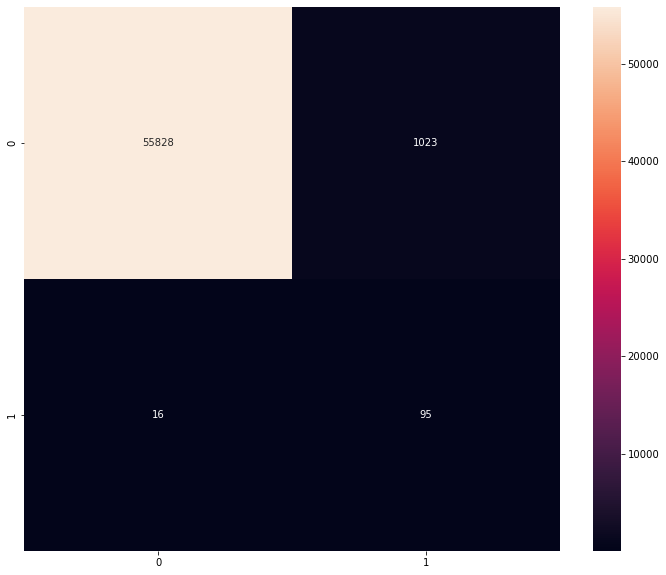

In [50]:
sns.heatmap(weighted_confusion, annot= True, fmt='d')

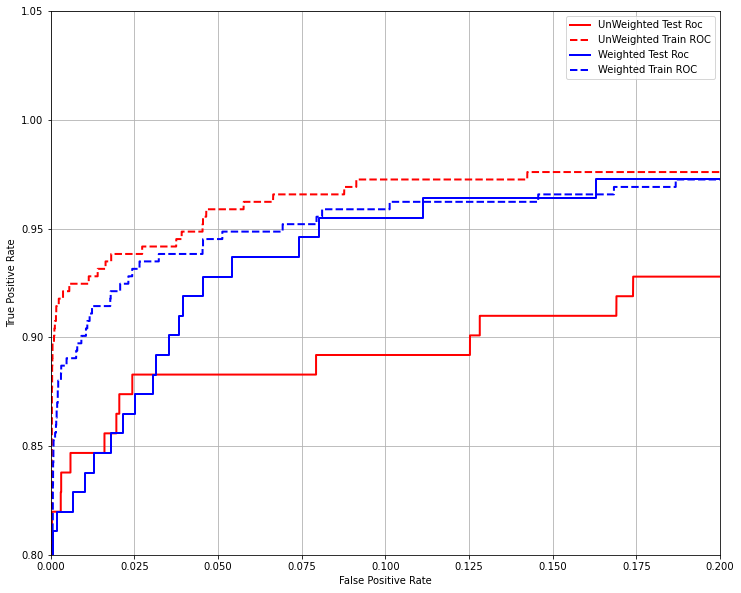

In [51]:
plot_roc(test_label, test_prediction_prob, label = "UnWeighted Test Roc", color = 'r')
plot_roc(train_label, train_prediction_prob, label = "UnWeighted Train ROC", 
         linestyle = '--', color = 'r')

plot_roc(test_label, test_weighted_prediction, label = "Weighted Test Roc", color = 'b')
plot_roc(train_label, train_weighted_prediction, label = "Weighted Train ROC", 
         linestyle = '--', color = 'b')
